### Import package 

In [14]:
import os, rasterio, geopandas as gpd, rioxarray as rxr
import geopandas as gpd, contextily as ctx, numpy as np, pandas as pd
import matplotlib.pyplot as plt, numpy as np, seaborn as sns

from osgeo import gdal, gdal_array
from rasterio import plot as rasterplot
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.colors import Normalize 
from matplotlib.ticker import PercentFormatter

### Function

In [3]:
# return a list of files containing given strings at the beginning and end
def getFileList(path=None, start=None, end=None):
    file_list = os.listdir(path)
    file_list = [i for i in file_list if i.startswith(start) and i.endswith(end)]
    return file_list

# return a list of files containing given strings at the end
def getFileList_end(path=None, end=None):
    file_list = os.listdir(path)
    file_list = [i for i in file_list if i.endswith(end)]
    return file_list

# return a list of files containing given strings at the beginning
def getFileList_start(path=None, start=None):
    file_list = os.listdir(path)
    file_list = [i for i in file_list if i.startswith(start)]
    return file_list

### Plot raster file

*Plot a raster file of categorical variable (e.g., Aspect)*

In [ ]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure' 
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
wk_path = os.path.join(base_path, '05-LandCover') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht


# file_ls = file_ls[:1]


for file in file_ls:
    ras = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze() # read a raster file using 'rioxarray' library

    fig, ax = plt.subplots(figsize=(8,6))
    ras.plot.imshow(cmap='Paired') #https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ax.set(title=" ")
    ax.set_axis_off()
    ax.set_title(f"{file[:-4]}")
    
    # Save the figure as *.png format
    out_fig = os.path.join(fig_path, f"{file[:-4]}_categ.png")
    plt.savefig(out_fig, dpi = 500)
    plt.close() # close a figure window
print("Done")   

*Plot a raster file of numerical (continuous) variable (e.g., Slope)*

In [ ]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure'
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
wk_path = os.path.join(base_path, '02-LAI') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht



# # Initialize variables to store minimum and maximum values across all files
# global_min = np.inf
# global_max = -np.inf

# # Loop through files to find the minimum and maximum values across all files
# for file in file_ls:
#     ras = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze()
#     file_min = ras.min()
#     file_max = ras.max()
#     if file_min < global_min:
#         global_min = file_min
#     if file_max > global_max:
#         global_max = file_max



# file_ls = ['Slope_degree_LT_30.tif']

for file in file_ls:
    ras = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze() # read a raster file using 'rioxarray' library
    
    fix, ax = plt.subplots(figsize=(8,6))
    ras.plot.imshow(cmap='Spectral') #https://matplotlib.org/stable/tutorials/colors/colormaps.html
    # ras.plot.imshow(cmap='Spectral', vmin=global_min, vmax=global_max)
    ax.set(title=" ")
    ax.set_axis_off()
    ax.set_title(f"{file[:-4]}")
    # 70 380
    # Save the figure as *.png format
    out_fig = os.path.join(fig_path, f"{file[:-4]}_continu_new.png")
    plt.savefig(out_fig, dpi = 500)
    plt. close() # close a figure window
print("Done")   

### Plot point shapefile (vector image) uring geopandas

In [ ]:
# data path 
gully_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input\00-Gully_location\revised_high_GT_12.shp'

# Read the shapefile into a GeoDataFrame:
gully = gpd.read_file(gully_path)

# check the CRS of a GeoPandas GeoDataFrame
print(gully.crs)

# Plot the GeoDataFrame using Matplotlib:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
gully.plot(ax=ax, marker='o', color='red', markersize=5)

# add a background using Contextily
# ctx.add_basemap(ax=ax, crs=gully.crs.to_string(), source=ctx.providers.Stamen.TonerLite)  # map
ctx.add_basemap(ax=ax, crs=gully.crs.to_string(), source=ctx.providers.Esri.WorldImagery) # satellite image

# # Save the figure as *.png format
out_fig = os.path.join(fig_path, "gully_erosion_location_satellite.png")
plt.savefig(out_fig, dpi = 500)
# plt. close() # close a figure window


plt.show()

### Plot raster and point file

In [ ]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure'
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
gully_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input\00-Gully_location\revised_high_GT_12.shp'
wk_path = os.path.join(base_path, '01-topography') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht

file_ls = ['Slope_degree_LT_30.tif']

for file in file_ls:
    # Read in the raster data using rioxarray:
    raster = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze()

    # Read in the point shapefile using geopandas:
    points = gpd.read_file(gully_path)

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the raster data using plot.imshow:
    raster.plot.imshow(ax=ax, cmap='Accent')
    
    # Plot the point shapefile on the same axis using plot:
    points.plot(ax=ax, markersize=7, color='red')

    # Set the x and y limits of the plot to match the extent of the raster data:
    ax.set_xlim([raster.x.min(), raster.x.max()])
    ax.set_ylim([raster.y.min(), raster.y.max()])

    plt.show()
    
    # # Save the figure as *.png format
    # out_fig = os.path.join(fig_path, "slope_point.png")
    # plt.savefig(out_fig, dpi = 500)
    # plt. close() # close a figure window
print("Done")   

In [ ]:
fig_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\figure'
base_path = r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input' # top-level (root) path for input data
wk_path = os.path.join(base_path, '01-topography') # folder containing input raster files
file_ls = getFileList_end(path = wk_path, end=".tif") # get a list of files within the given paht

# file_ls = ['Slope_degree_LT_30.tif']

for file in file_ls:
    ras = rxr.open_rasterio(os.path.join(wk_path, file), masked=True).squeeze() # read a raster file using 'rioxarray' library
    
    fix, ax = plt.subplots(figsize=(8,6))
    ras.plot.imshow(cmap='Spectral') #https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ax.set(title=" ")
    ax.set_axis_off()
    ax.set_title(f"{file[:-4]}")
    
    # Save the figure as *.png format
    out_fig = os.path.join(fig_path, f"{file[:-4]}.png")
    plt.savefig(out_fig, dpi = 500)
    plt. close() # close a figure window
print("Done")   

### Calculate correlation

In [3]:
import xarray as xr, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
from scipy.stats import pearsonr

In [4]:
os.chdir(r'E:\02_Research\01_Codes\04-DAIS\GullyErosion_2023_Spring\input\03-Precip\seasonal_max_pcp')

# Read raster files
ndvi = rxr.open_rasterio("fall_max.tif", masked=True).squeeze()
lai = rxr.open_rasterio("spring_max.tif", masked=True).squeeze()
dem = rxr.open_rasterio("summer_max.tif", masked=True).squeeze()
precipitation = rxr.open_rasterio("winter_max.tif", masked=True).squeeze()

In [5]:
print(type(dem)), dem

<class 'xarray.core.dataarray.DataArray'>


(None,
 <xarray.DataArray (y: 16209, x: 20732)>
 [336044988 values with dtype=float32]
 Coordinates:
     band         int32 1
   * x            (x) float64 -89.15 -89.15 -89.15 -89.15 ... -88.7 -88.7 -88.7
   * y            (y) float64 38.48 38.48 38.48 38.48 ... 38.12 38.12 38.12 38.12
     spatial_ref  int32 0
 Attributes:
     RepresentationType:      ATHEMATIC
     STATISTICS_COVARIANCES:  97.76097769704869
     STATISTICS_MAXIMUM:      110.9953918457
     STATISTICS_MEAN:         84.1706396782
     STATISTICS_MINIMUM:      62.677444458008
     STATISTICS_SKIPFACTORX:  1
     STATISTICS_SKIPFACTORY:  1
     STATISTICS_STDDEV:       9.8874151170591
     scale_factor:            1.0
     add_offset:              0.0)

In [6]:
# Convert to np masked arrays and flatten
ndvi_arr = ndvi.to_masked_array().flatten()
lai_arr = lai.to_masked_array().flatten()
dem_arr = dem.to_masked_array().flatten()
precip_arr = precipitation.to_masked_array().flatten()


In [7]:
print(type(dem_arr)), dem_arr

<class 'numpy.ma.core.MaskedArray'>


(None,
 masked_array(data=[--, --, --, ..., --, --, --],
              mask=[ True,  True,  True, ...,  True,  True,  True],
        fill_value=1e+20,
             dtype=float32))

In [8]:
# Create a pandas DataFrame with the raster data
df = pd.DataFrame({'NDVI': ndvi_arr, 'LAI': lai_arr, 'DEM': dem_arr, 'Precipitation': precip_arr})
df

,NDVI,LAI,DEM,Precipitation
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
336044983,NaN,NaN,NaN,NaN
336044984,NaN,NaN,NaN,NaN
336044985,NaN,NaN,NaN,NaN
336044986,NaN,NaN,NaN,NaN


In [9]:
# Remove masked values (no-data)
valid_data = (~ndvi_arr.mask) & (~lai_arr.mask) & (~dem_arr.mask) & (~precip_arr.mask)
ndvi_arr = ndvi_arr[valid_data].data
lai_arr = lai_arr[valid_data].data
dem_arr = dem_arr[valid_data].data
precip_arr = precip_arr[valid_data].data


In [10]:
print(type(dem_arr)), dem_arr

<class 'numpy.ndarray'>


(None,
 array([87.6621 , 87.6621 , 87.6621 , ..., 91.04195, 93.26325, 93.26325],
       dtype=float32))

In [14]:
# Create a pandas DataFrame with the raster data
df = pd.DataFrame({'NDVI': ndvi_arr, 'LAI': lai_arr, 'DEM': dem_arr, 'Precipitation': precip_arr})


,NDVI,LAI,DEM,Precipitation
0,78.362999,58.763828,87.662102,64.445045
1,78.362999,58.763828,87.662102,64.445045
2,78.362999,58.763828,87.662102,64.445045
3,78.362999,58.763828,87.662102,64.445045
4,78.362999,58.763828,87.662102,64.445045
...,...,...,...,...
194708139,52.274727,67.432259,91.041946,78.736618
194708140,52.274727,67.432259,91.041946,78.736618
194708141,52.274727,67.432259,91.041946,78.736618
194708142,53.268345,66.221413,93.263252,80.230156


In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,NDVI,LAI,DEM,Precipitation
NDVI,1.000000,-0.496821,0.302727,-0.236021
LAI,-0.496821,1.000000,0.281634,-0.450016
DEM,0.302727,0.281634,1.000000,-0.558836
Precipitation,-0.236021,-0.450016,-0.558836,1.000000


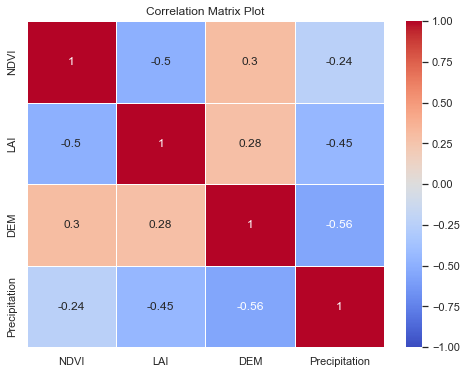

In [16]:
# Create a correlation matrix plot using seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix Plot")
plt.show()

##### ver 2. GDAL

In [15]:

out_path = r'E:\02_Research\01_Codes\04-DAIS\02_GullyErosion_2023_Spring\figure_sample'
path = r'E:\02_Research\01_Codes\04-DAIS\02_GullyErosion_2023_Spring\input_sample'
folder_ls = ['continuous']

for folder in folder_ls:
    arr_ls = []
    tif_ls = getFileList_end(os.path.join(path, folder), ".tif")
    os.chdir(os.path.join(path, folder))
    raw_rasters = [i[:-4] for i in tif_ls] # raw_rasters = ['20000105_corn_Clay', '20000105_corn_DewTemp']
    
    ras_df = pd.DataFrame()
    nodata_dic = {}
    for i in range(len(raw_rasters)):
        # get nodata values
        ras = gdal.Open(tif_ls[i])
        band = ras.GetRasterBand(1)
        nodata_val = band.GetNoDataValue()
        nodata_dic[raw_rasters[i]] = nodata_val
        
        # Raster to Dataframe
        arr = gdal_array.LoadFile(tif_ls[i])
        ras_df[raw_rasters[i]] = arr.flatten()
    col_ls = list(ras_df.columns)
    for col in col_ls:
        ras_df.drop(ras_df[ras_df[col]==nodata_dic[col]].index, inplace=True)
        
    # Calculate the correlation matrix
    corr_matrix = ras_df.corr()
    corr_matrix.to_excel(os.path.join(out_path, f"correl_{folder}.xlsx"))
    
    # Create a correlation matrix plot using seaborn
    sns.set(style="white")
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
    plt.title("Correlation Matrix Plot")
    
    # Save the figure as *.png format
    out_fig = os.path.join(out_path, f"correl_{folder}.png")
    plt.savefig(out_fig, dpi = 300)
    plt.close() # close a figure window
            
    
print("Done")

##### Plot correlation matrix using the excel files

In [16]:
path = r'E:\02_Research\01_Codes\04-DAIS\02_GullyErosion_2023_Spring\figure_sample'
os.chdir(path)
excel_ls = getFileList_end(path, ".xlsx")

for excel in excel_ls:
    corr_matrix = pd.read_excel(excel, index_col=0)
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create a custom diverging colormap
    """
    The sns.diverging_palette() function creates a custom diverging color palette that starts 
    with one color (230, in this case, a light blue color) and ends with another color (20, in this case, a dark red color).
    The as_cmap=True argument tells the function to return a colormap object, which can be used in the heatmap function.
    """
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Create a correlation matrix plot using seaborn
    sns.set(style="white")
    plt.figure(figsize=(10, 8))
    # sns.heatmap(corr_matrix, annot=True, cmap="Spectral", linewidths=.5, vmin=-1, vmax=1)
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap, linewidths=.5, vmin=-1, vmax=1)
    # sns.heatmap(corr_matrix, annot=True, mask=mask, cmap="Spectral", linewidths=.5, vmin=-1, vmax=1)
    plt.title("Correlation Matrix Plot")

    # Save the figure as *.png format
    out_fig = os.path.join(path, f"{excel[:-5]}_new.png")
    plt.savefig(out_fig, dpi = 300)
    plt.close() # close a figure window
print("Done")

Done


## Study flow
1. test collinearity 
2. extract values of predictors at eorion points and create pseudo-absence (background) points 
3. feature selection
    3.1. correlation coefficient: linear
    3.2. mutual_info_classif using 'SelectKBest': non-linear
4. train a model
5. Compare and evaluate models

### Extract values from raster files 
- extract the values of your predictor variables (NDVI, LAI, elevation, slope, and clay content) at each erosion location from your point file and raster datasets